In [1]:
import warnings
warnings.simplefilter('ignore')
from neurocaps.extraction import TimeseriesExtractor
from neurocaps.analysis import CAP, merge_dicts

help(TimeseriesExtractor)
parcel_approach = {"Schaefer": {"n_rois": 100, "yeo_networks": 7, "resolution_mm": 2}}
#parcel_approach = {"AAL": {"version": "SPM12"}}

ncol = parcel_approach["Schaefer"]["n_rois"] if "Schaefer" in parcel_approach.keys() else 116
extractor = TimeseriesExtractor(parcel_approach=parcel_approach)

Help on class TimeseriesExtractor in module neurocaps.extraction.timeseriesextractor:

class TimeseriesExtractor(neurocaps._utils._timeseriesextractor_internals._timeseriesextractorgetter._TimeseriesExtractorGetter)
 |  TimeseriesExtractor(space: str = 'MNI152NLin2009cAsym', standardize: Union[bool, str] = 'zscore_sample', detrend: bool = True, low_pass: Optional[float] = None, high_pass: Optional[float] = None, parcel_approach: Dict[str, Dict] = {'Schaefer': {'n_rois': 400, 'yeo_networks': 7, 'resolution_mm': 1}}, use_confounds: bool = True, confound_names: Optional[List[str]] = None, fwhm: Optional[float] = None, fd_threshold: Optional[float] = None, n_acompcor_separate: Optional[int] = None, dummy_scans: Optional[int] = None) -> None
 |  
 |  **Timeseries Extractor Class**
 |  
 |  Initializes the TimeseriesExtractor class.
 |  
 |  Parameters
 |  ----------
 |      space : str, default="MNI152NLin2009cAsym"
 |          The standard template space that the preprocessed bold data is 

In [2]:
extractor.parcel_approach

{'Schaefer': {'n_rois': 100,
  'yeo_networks': 7,
  'resolution_mm': 2,
  'maps': 'C:\\Users\\donis/nilearn_data\\schaefer_2018\\Schaefer2018_100Parcels_7Networks_order_FSLMNI152_2mm.nii.gz',
  'nodes': ['LH_Vis_1',
   'LH_Vis_2',
   'LH_Vis_3',
   'LH_Vis_4',
   'LH_Vis_5',
   'LH_Vis_6',
   'LH_Vis_7',
   'LH_Vis_8',
   'LH_Vis_9',
   'LH_SomMot_1',
   'LH_SomMot_2',
   'LH_SomMot_3',
   'LH_SomMot_4',
   'LH_SomMot_5',
   'LH_SomMot_6',
   'LH_DorsAttn_Post_1',
   'LH_DorsAttn_Post_2',
   'LH_DorsAttn_Post_3',
   'LH_DorsAttn_Post_4',
   'LH_DorsAttn_Post_5',
   'LH_DorsAttn_Post_6',
   'LH_DorsAttn_PrCv_1',
   'LH_DorsAttn_FEF_1',
   'LH_SalVentAttn_ParOper_1',
   'LH_SalVentAttn_FrOperIns_1',
   'LH_SalVentAttn_FrOperIns_2',
   'LH_SalVentAttn_PFCl_1',
   'LH_SalVentAttn_Med_1',
   'LH_SalVentAttn_Med_2',
   'LH_SalVentAttn_Med_3',
   'LH_Limbic_OFC_1',
   'LH_Limbic_TempPole_1',
   'LH_Limbic_TempPole_2',
   'LH_Cont_Par_1',
   'LH_Cont_PFCl_1',
   'LH_Cont_pCun_1',
   'LH_Cont_C

In [3]:
help(extractor.get_bold)

Help on method get_bold in module neurocaps.extraction.timeseriesextractor:

get_bold(bids_dir: Union[str, os.PathLike], task: str, session: Union[str, int, NoneType] = None, runs: Optional[List[int]] = None, condition: Optional[str] = None, tr: Union[int, float, NoneType] = None, run_subjects: Optional[List[str]] = None, exclude_subjects: Optional[List[str]] = None, pipeline_name: Optional[str] = None, n_cores: Optional[int] = None, verbose: bool = True, flush_print: bool = False, exclude_niftis: Optional[List[str]] = None) -> None method of neurocaps.extraction.timeseriesextractor.TimeseriesExtractor instance
    **Get BOLD Data**
    
    Collects files needed to extract timeseries data from NIfTI files for BIDS-compliant datasets containing a
    derivatives folder. This function assumes that your BOLD data was preprocessed using a standard
    preprocessing pipeline such as fMRIPrep.
    
    Parameters
    ----------
        bids_dir : Path
            Path to a BIDS compliant di

In [4]:
# Attributes

print(dir(extractor))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_parcel_approach', '_setup_extraction', '_signal_clean_info', '_space', 'get_bold', 'get_files', 'n_cores', 'parcel_approach', 'signal_clean_info', 'space', 'subject_ids', 'subject_timeseries', 'task_info', 'timeseries_to_pickle', 'visualize_bold']


In [5]:
# Example structure of what extractor.get_bold() produces; the rows would be equal to the TRs and the columnn would be equal to the number of nodes. 
# So, all subjects would have the same column length which depends on the number inputted in n_nodes when initializing TimeseriesExtractor
# For visualization purposes, I will print out 5 by 5 arrays to show the general structure
import numpy as np

print({str(x) : {f"run-{y}": np.random.rand(5,5) for y in range(1,4)} for x in range(1,2)})

{'1': {'run-1': array([[0.33412691, 0.30498281, 0.14716367, 0.56478662, 0.71241527],
       [0.24986495, 0.018229  , 0.58379434, 0.03225193, 0.2452785 ],
       [0.46930018, 0.31426939, 0.13509041, 0.94180188, 0.37664107],
       [0.87143841, 0.14543841, 0.85292368, 0.65062992, 0.92731433],
       [0.89411486, 0.0562171 , 0.07338522, 0.34236208, 0.96034934]]), 'run-2': array([[0.24222682, 0.67165584, 0.69101173, 0.79613614, 0.12983532],
       [0.67082641, 0.2632425 , 0.80267397, 0.00327825, 0.7063581 ],
       [0.21356614, 0.96570473, 0.60791263, 0.84091839, 0.5389618 ],
       [0.23501315, 0.21704502, 0.53885743, 0.02391408, 0.80993325],
       [0.8640461 , 0.32916685, 0.46539674, 0.33880531, 0.0765494 ]]), 'run-3': array([[0.84040764, 0.48416904, 0.04014538, 0.87647302, 0.97715538],
       [0.0161515 , 0.02902081, 0.1616379 , 0.32621135, 0.00460609],
       [0.55884612, 0.15859449, 0.78822697, 0.96378084, 0.91751446],
       [0.53316049, 0.02757686, 0.2364889 , 0.39751775, 0.7950922

In [6]:
# Generating a fuller subject timeseries for later cap analysis
extractor.subject_timeseries = {str(x) : {f"run-{y}": np.random.rand(50,ncol) for y in range(1,4)} for x in range(1,11)}

In [7]:
extractor.parcel_approach = parcel_approach

In [8]:
extractor.parcel_approach 

{'Schaefer': {'n_rois': 100,
  'yeo_networks': 7,
  'resolution_mm': 2,
  'maps': 'C:\\Users\\donis/nilearn_data\\schaefer_2018\\Schaefer2018_100Parcels_7Networks_order_FSLMNI152_2mm.nii.gz',
  'nodes': ['LH_Vis_1',
   'LH_Vis_2',
   'LH_Vis_3',
   'LH_Vis_4',
   'LH_Vis_5',
   'LH_Vis_6',
   'LH_Vis_7',
   'LH_Vis_8',
   'LH_Vis_9',
   'LH_SomMot_1',
   'LH_SomMot_2',
   'LH_SomMot_3',
   'LH_SomMot_4',
   'LH_SomMot_5',
   'LH_SomMot_6',
   'LH_DorsAttn_Post_1',
   'LH_DorsAttn_Post_2',
   'LH_DorsAttn_Post_3',
   'LH_DorsAttn_Post_4',
   'LH_DorsAttn_Post_5',
   'LH_DorsAttn_Post_6',
   'LH_DorsAttn_PrCv_1',
   'LH_DorsAttn_FEF_1',
   'LH_SalVentAttn_ParOper_1',
   'LH_SalVentAttn_FrOperIns_1',
   'LH_SalVentAttn_FrOperIns_2',
   'LH_SalVentAttn_PFCl_1',
   'LH_SalVentAttn_Med_1',
   'LH_SalVentAttn_Med_2',
   'LH_SalVentAttn_Med_3',
   'LH_Limbic_OFC_1',
   'LH_Limbic_TempPole_1',
   'LH_Limbic_TempPole_2',
   'LH_Cont_Par_1',
   'LH_Cont_PFCl_1',
   'LH_Cont_pCun_1',
   'LH_Cont_C

In [9]:
# Save randomly generated data in directory where jupyter notebook is running

import os, joblib

output_dir = os.path.dirname(__vsc_ipynb_file__)

extractor.timeseries_to_pickle(output_dir=output_dir, file_name="sample_for_neurocaps_demo_timeseries.pkl")

with open("sample_for_neurocaps_demo_timeseries.pkl", "rb") as f:
    subject_timeseries = joblib.load(f)


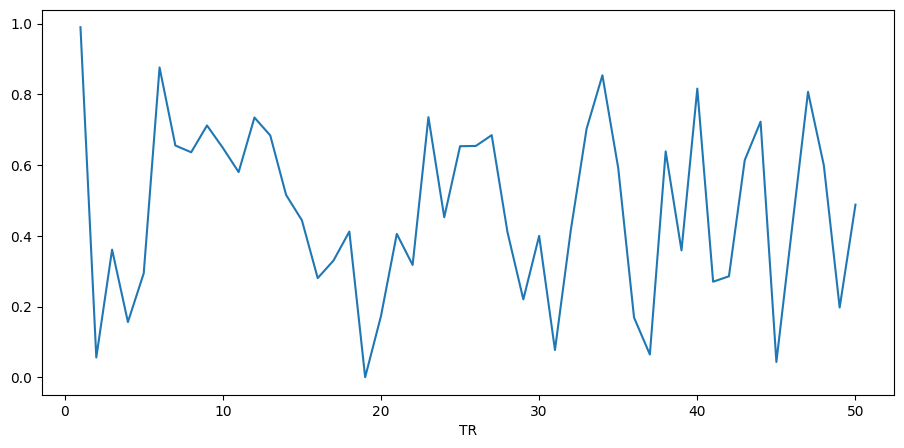

In [10]:
# Visualize Bold at node level

extractor.visualize_bold(subj_id="1",run=1, roi_indx=0)

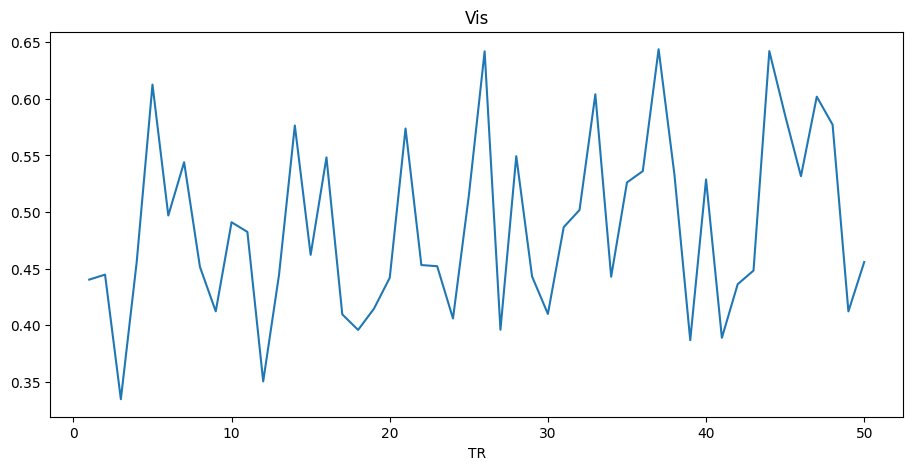

In [11]:
# Visualize Bold at network level
if ncol == 116:
    extractor.visualize_bold(subj_id="1",run=1, region="Cerebelum")
else:
    extractor.visualize_bold(subj_id="1",run=1, region="Vis")

In [12]:
# Performing Cap analysis with all subjects 

#cap_analysis = CAP(parcel_approach=extractor.parcel_approach, n_clusters=3)
cap_analysis = CAP(n_clusters=3)
cap_analysis.get_caps(subject_timeseries=extractor.subject_timeseries)

In [13]:
cap_analysis.parcel_approach

In [14]:
subject_timeseries.keys()

dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

Optimal cluster size for A is 9.



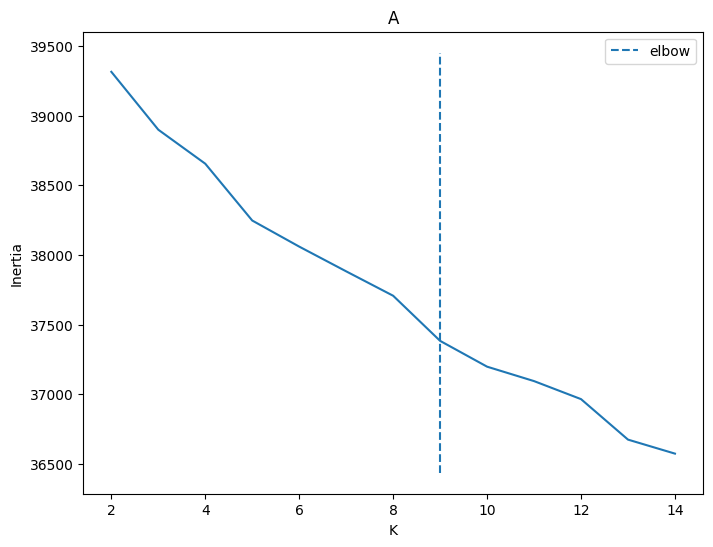

Optimal cluster size for B is 8.



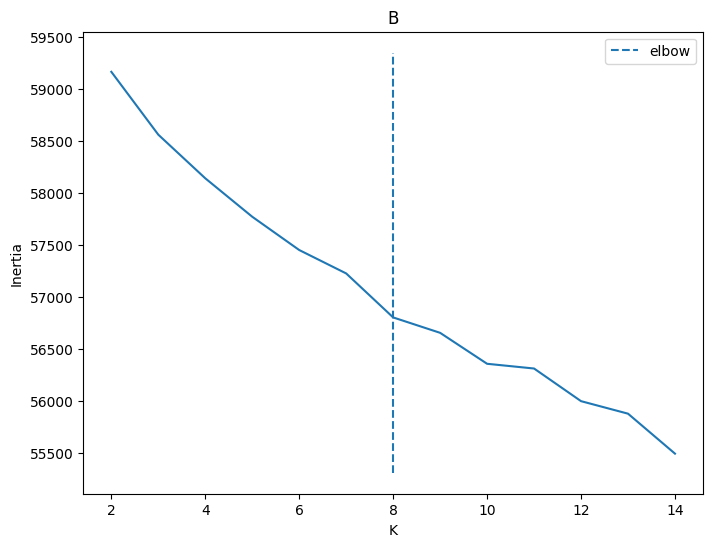

In [15]:
# Performing Cap analysis with groups, list of n_clusters, and elbow cluster selection method

cap_analysis = CAP(groups={"A": ["1","2","3","5"], "B": ["4","6","7","8","9","10"]}, n_clusters=list(range(2,15)), cluster_selection_method="elbow")

# When elbow method is specified, the associated plots will be shown, furthermore, the saved kmeans model for each group will automatically save to the optimal cluster size
#cap_analysis.get_caps(subject_timeseries="sample_for_neurocaps_demo_timeseries.pkl", runs=[1,2], show_figs=True, output_dir=output_dir)

cap_analysis.get_caps(subject_timeseries="sample_for_neurocaps_demo_timeseries.pkl", runs=[1,2], show_figs=True, output_dir=output_dir)

In [16]:
# Performing Cap analysis with groups, list of n_clusters, and silhouette cluster selection method

cap_analysis = CAP(groups={"A": ["1","2","3","5"], "B": ["4","6","7","8","9","10"]}, n_clusters=list(range(2,4)), cluster_selection_method="silhouette")

cap_analysis.get_caps(subject_timeseries="sample_for_neurocaps_demo_timeseries.pkl")

# kmeans model automatically save to the optimal size
cap_analysis.kmeans

Optimal cluster size for A is 2.
Optimal cluster size for B is 2.


{'A': KMeans(n_clusters=2), 'B': KMeans(n_clusters=2)}

In [17]:
cap_analysis.parcel_approach = parcel_approach

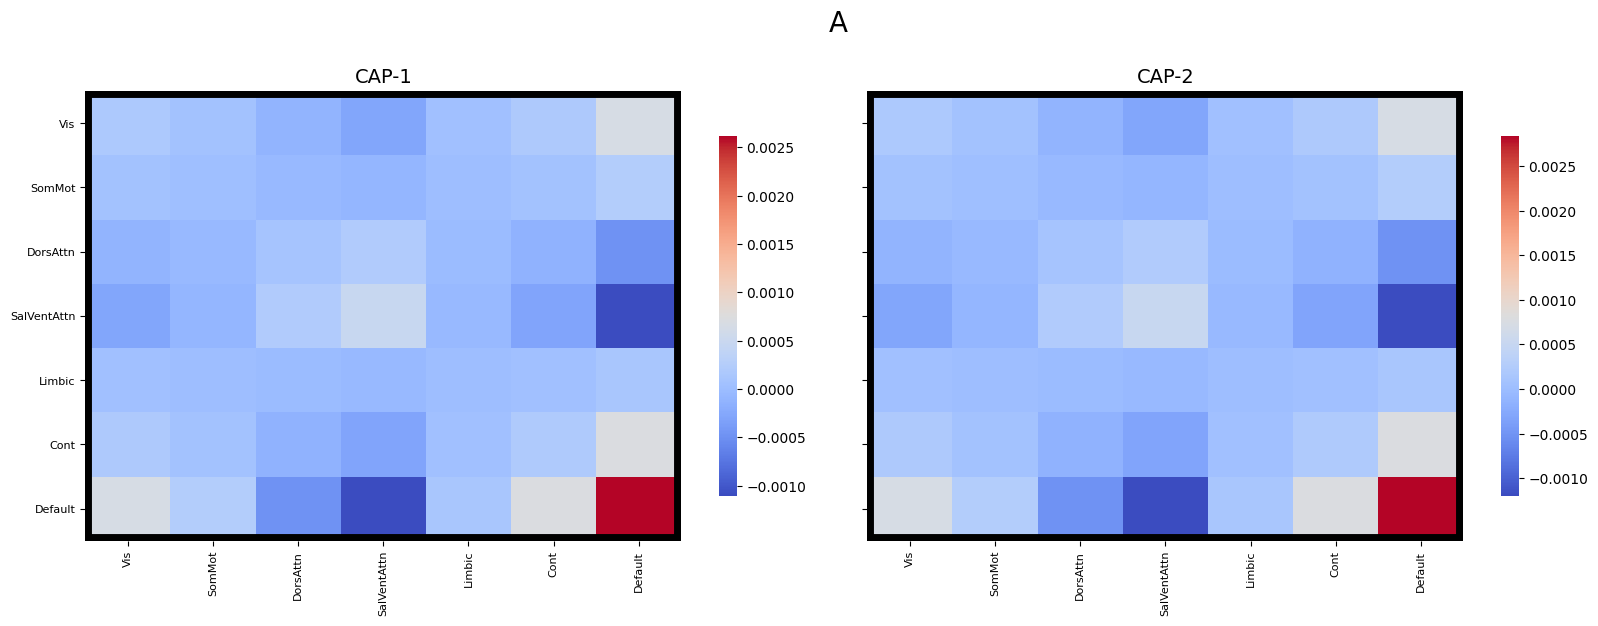

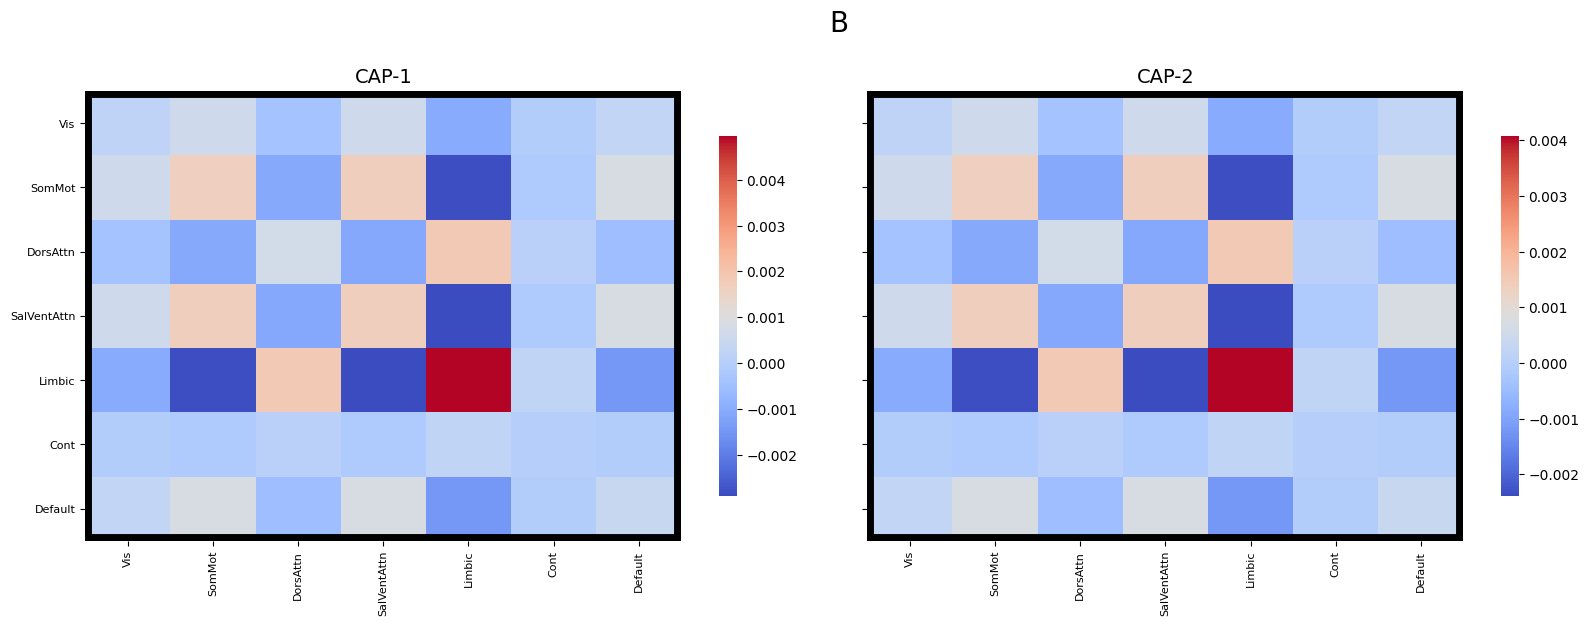

In [18]:
# Visualize Caps
#cap_analysis.caps2plot(subplots=True, xlabel_rotation=90, sharey=True, output_dir=output_dir)
cap_analysis.caps2plot(subplots=True, xlabel_rotation=90, sharey=True, borderwidths=10)

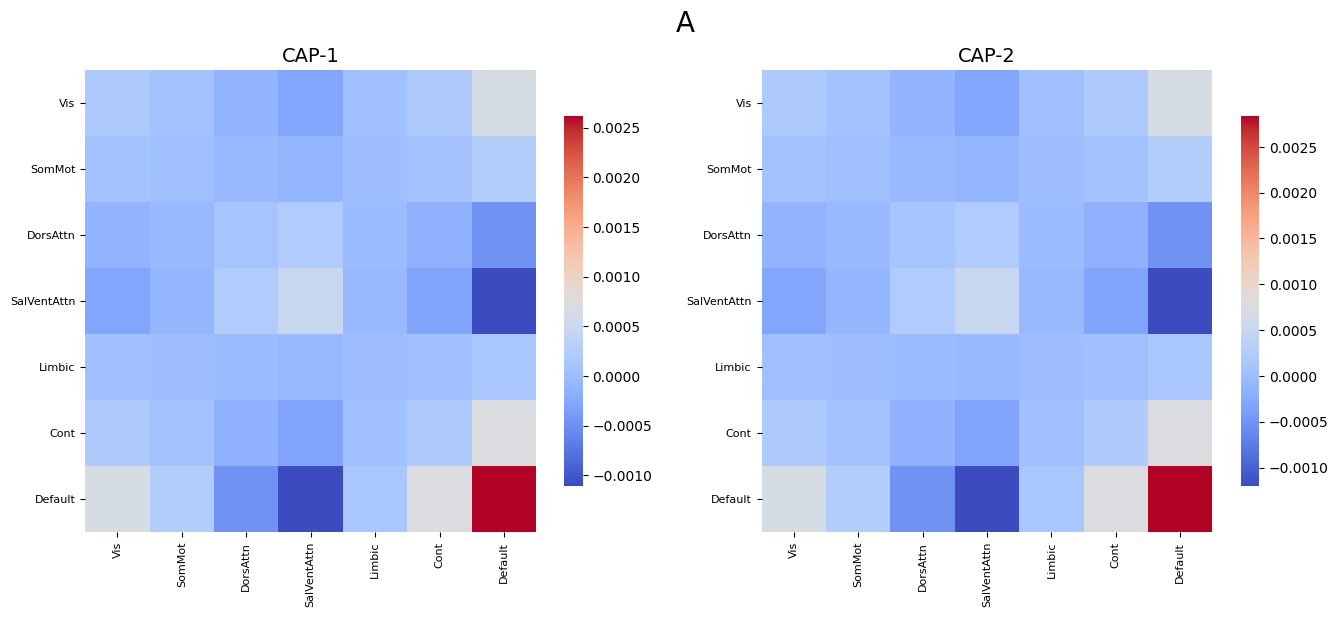

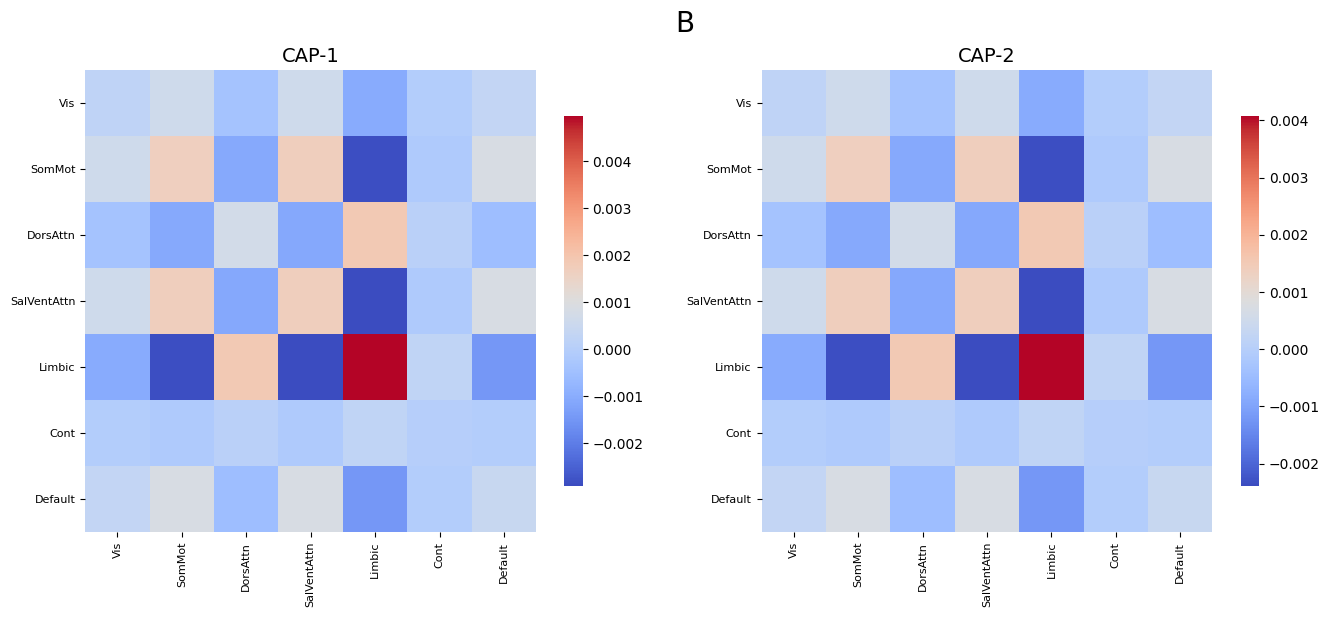

In [19]:
# Visualize Caps
cap_analysis.caps2plot(subplots=True, xlabel_rotation=90, hspace=0.6, tight_layout=False, sharey = False)

Invalid kwargs arguments used and will be ignored {'set_xlim': (-20, 120)}.


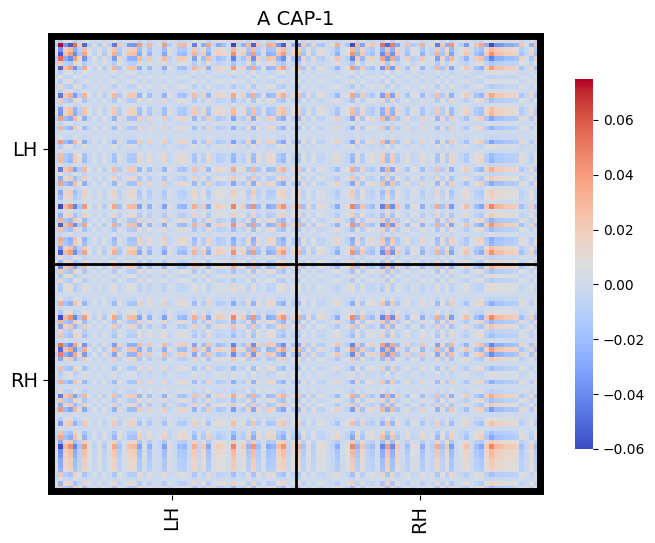

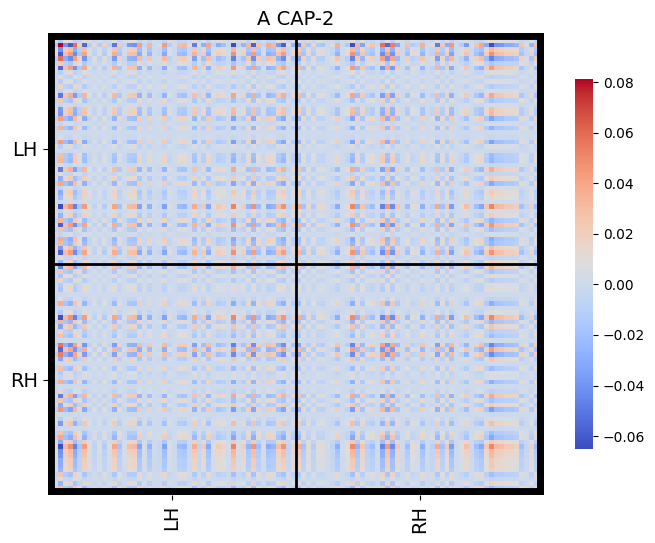

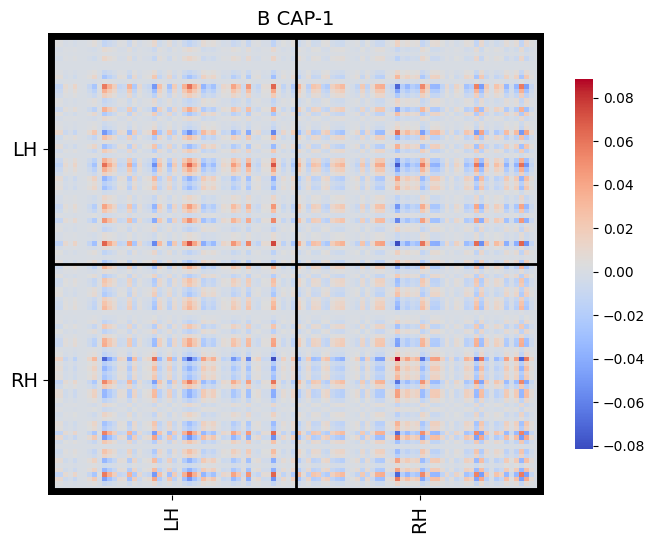

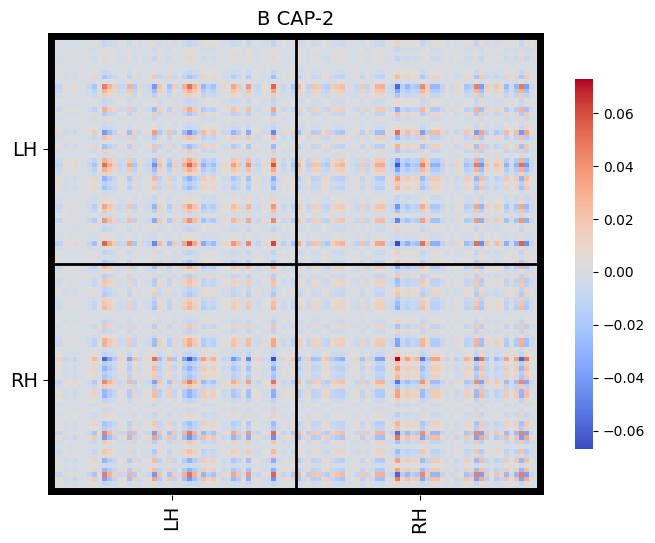

In [20]:
# Change scope from network to nodes

cap_analysis.caps2plot(subplots=False, yticklabels_size=14, wspace = 0.1, visual_scope="nodes", xlabel_rotation=90, xticklabels_size = 14, hspace = 0.6, tight_layout = False, hemisphere_labels=True, borderwidths=10, set_xlim = (-20, 120), linewidths=2)

In [21]:
cap_analysis._region_caps

{'A': {'CAP-1': array([-0.01298492, -0.00463417,  0.00947724,  0.0215906 , -0.0023288 ,
         -0.01399145, -0.05117184]),
  'CAP-2': array([ 0.01351491,  0.00482332, -0.00986407, -0.02247185,  0.00242386,
          0.01456252,  0.05326049])},
 'B': {'CAP-1': array([ 0.01491287,  0.04067199, -0.02679919,  0.04120786, -0.07040679,
         -0.00351217,  0.02075844]),
  'CAP-2': array([-0.01352269, -0.03688053,  0.02430096, -0.03736645,  0.06384345,
          0.00318476, -0.01882333])}}

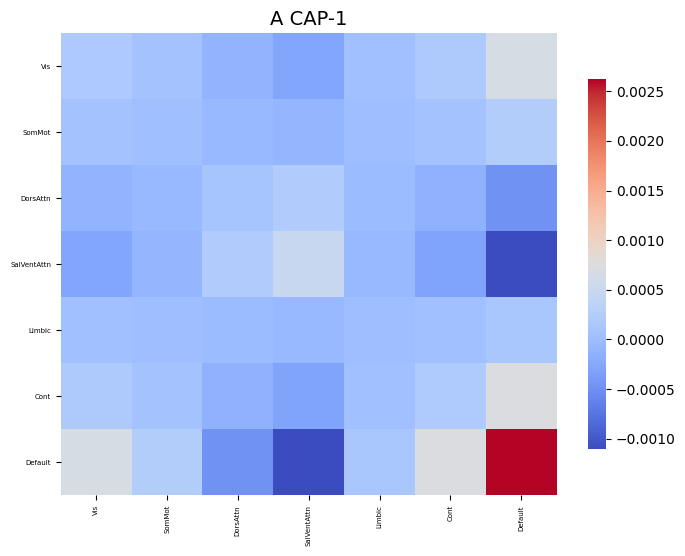

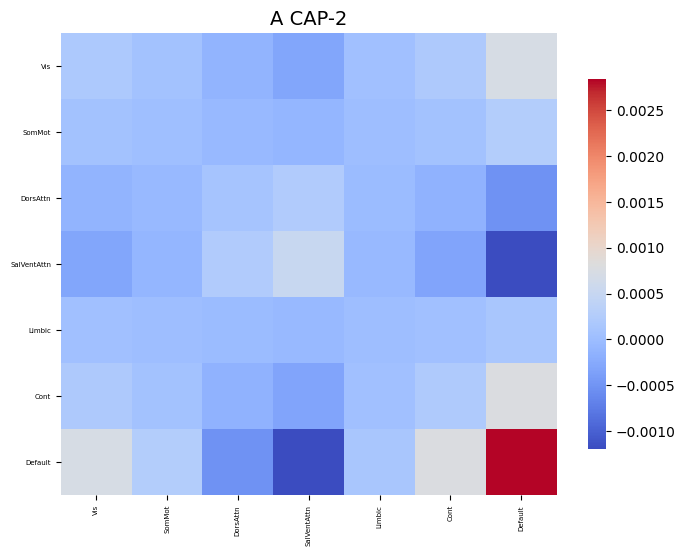

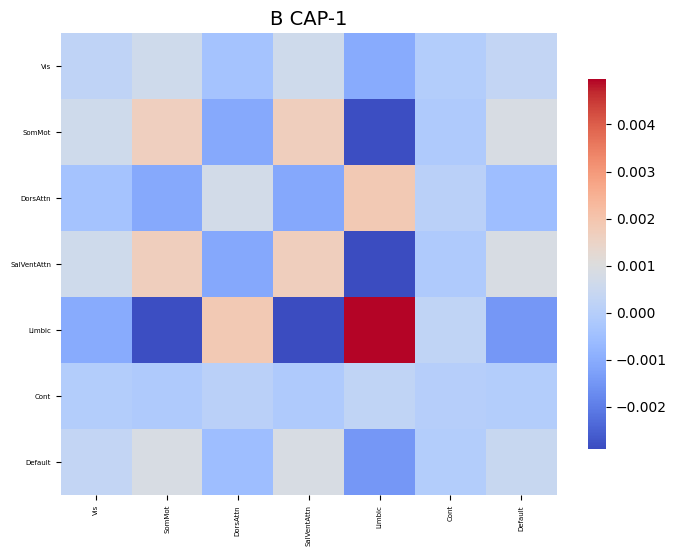

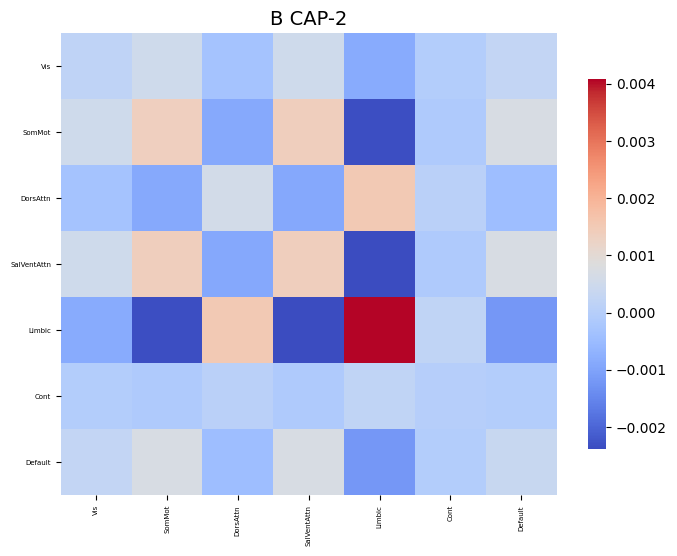

In [22]:
cap_analysis.caps2plot(subplots=False, yticklabels_size=5, wspace = 0.1, visual_scope="regions", xlabel_rotation=90, xticklabels_size = 5, hspace = 0.6, tight_layout = False)

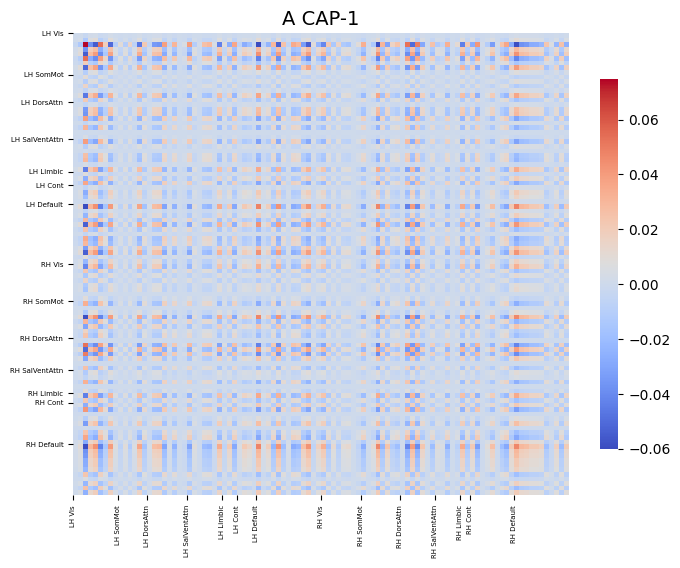

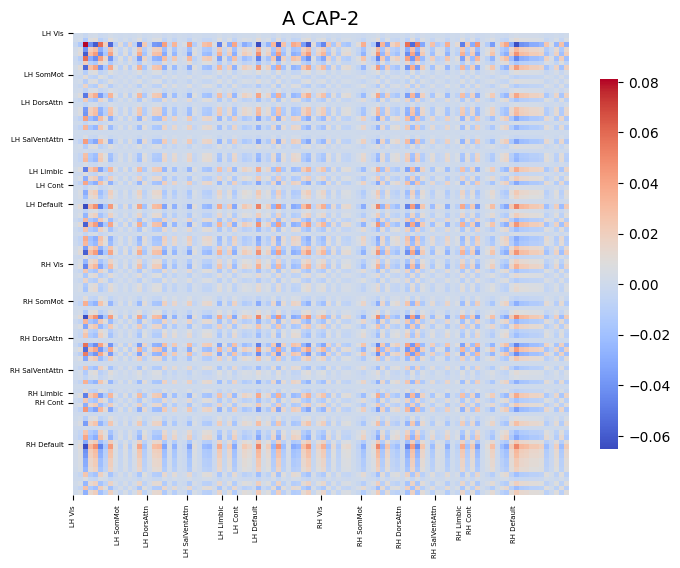

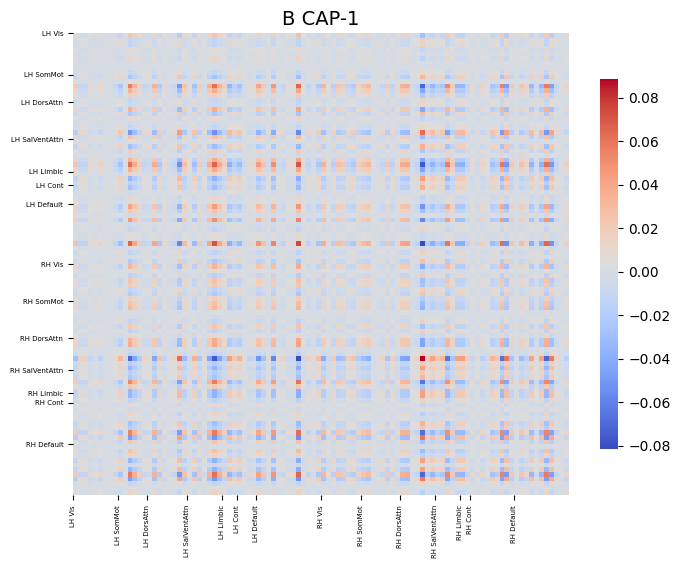

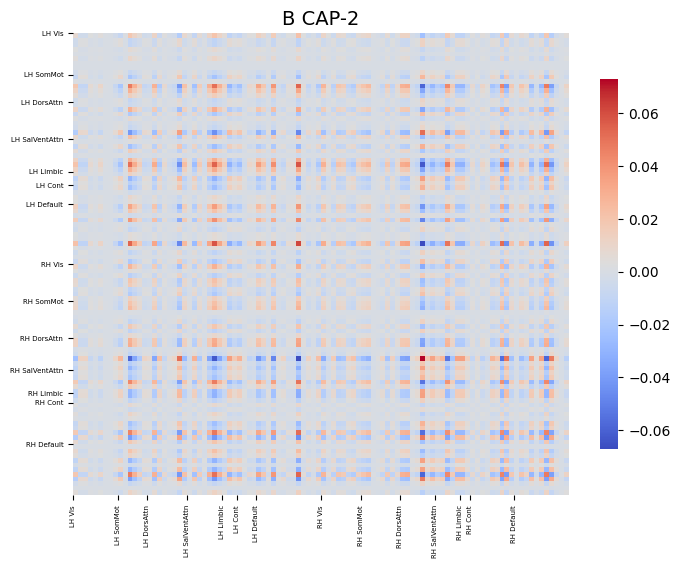

In [23]:
cap_analysis.caps2plot(subplots=False, yticklabels_size=5, wspace = 0.1, visual_scope="nodes", xlabel_rotation=90, xticklabels_size = 5, hspace = 0.6, tight_layout = False)

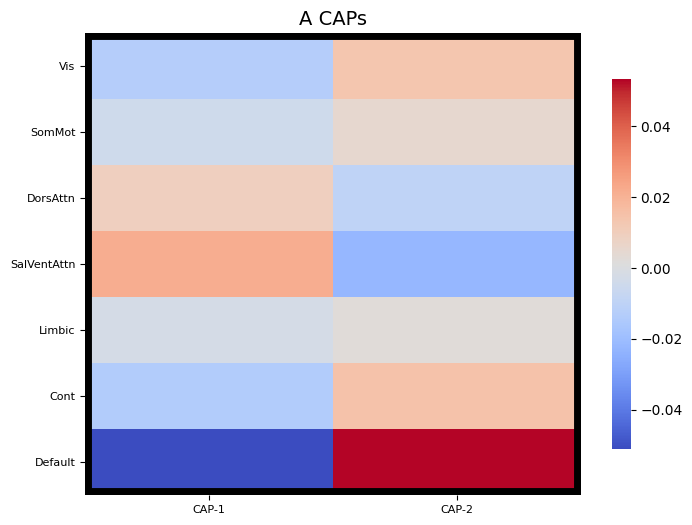

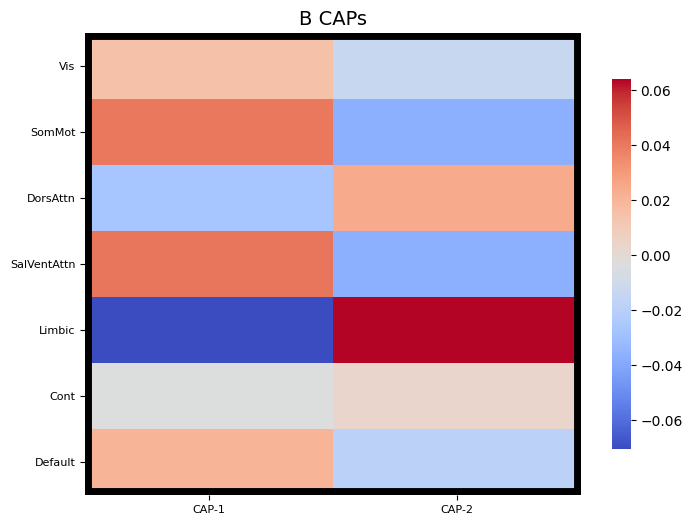

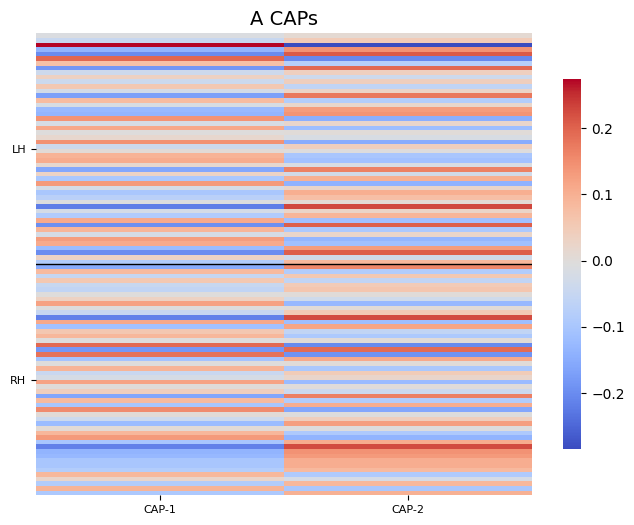

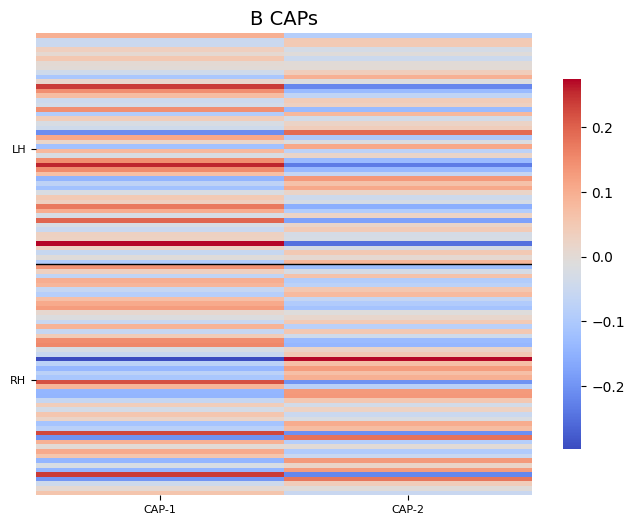

In [24]:
# Get regular heatmap 
cap_analysis.caps2plot(subplots=True, visual_scope="regions", plot_options="heatmap", borderwidths=10)
cap_analysis.caps2plot(subplots=True, visual_scope="nodes", plot_options="heatmap", hemisphere_labels = True)

In [25]:
# Calculate cap metrics
# cap_analysis.calculate_metrics(subject_timeseries=extractor.subject_timeseries,tr=2,metrics="persistence",return_df=True, output_dir=output_dir, file_name="Group_CAPs_metrics")
cap_analysis.calculate_metrics(subject_timeseries=extractor.subject_timeseries,tr=2,metrics="persistence",return_df=True)

{'persistence':    Subject_ID Group    Run     CAP-1     CAP-2
 0           1     A  run-1  4.307692  3.384615
 1           1     A  run-2  4.000000  4.000000
 2           1     A  run-3  5.200000  4.800000
 3           2     A  run-1  6.444444  4.666667
 4           2     A  run-2  3.800000  6.200000
 5           2     A  run-3  4.000000  3.692308
 6           3     A  run-1  4.461538  3.230769
 7           3     A  run-2  4.545455  4.166667
 8           3     A  run-3  3.857143  3.066667
 9           5     A  run-1  3.714286  3.428571
 10          5     A  run-2  4.666667  4.000000
 11          5     A  run-3  3.800000  5.636364
 12          4     B  run-1  2.571429  4.266667
 13          4     B  run-2  4.181818  4.500000
 14          4     B  run-3  3.571429  3.571429
 15          6     B  run-1  3.818182  5.272727
 16          6     B  run-2  3.500000  4.833333
 17          6     B  run-3  2.923077  4.769231
 18          7     B  run-1  4.666667  4.000000
 19          7     B  run

Invalid kwargs arguments used and will be ignored {'y': -3}.


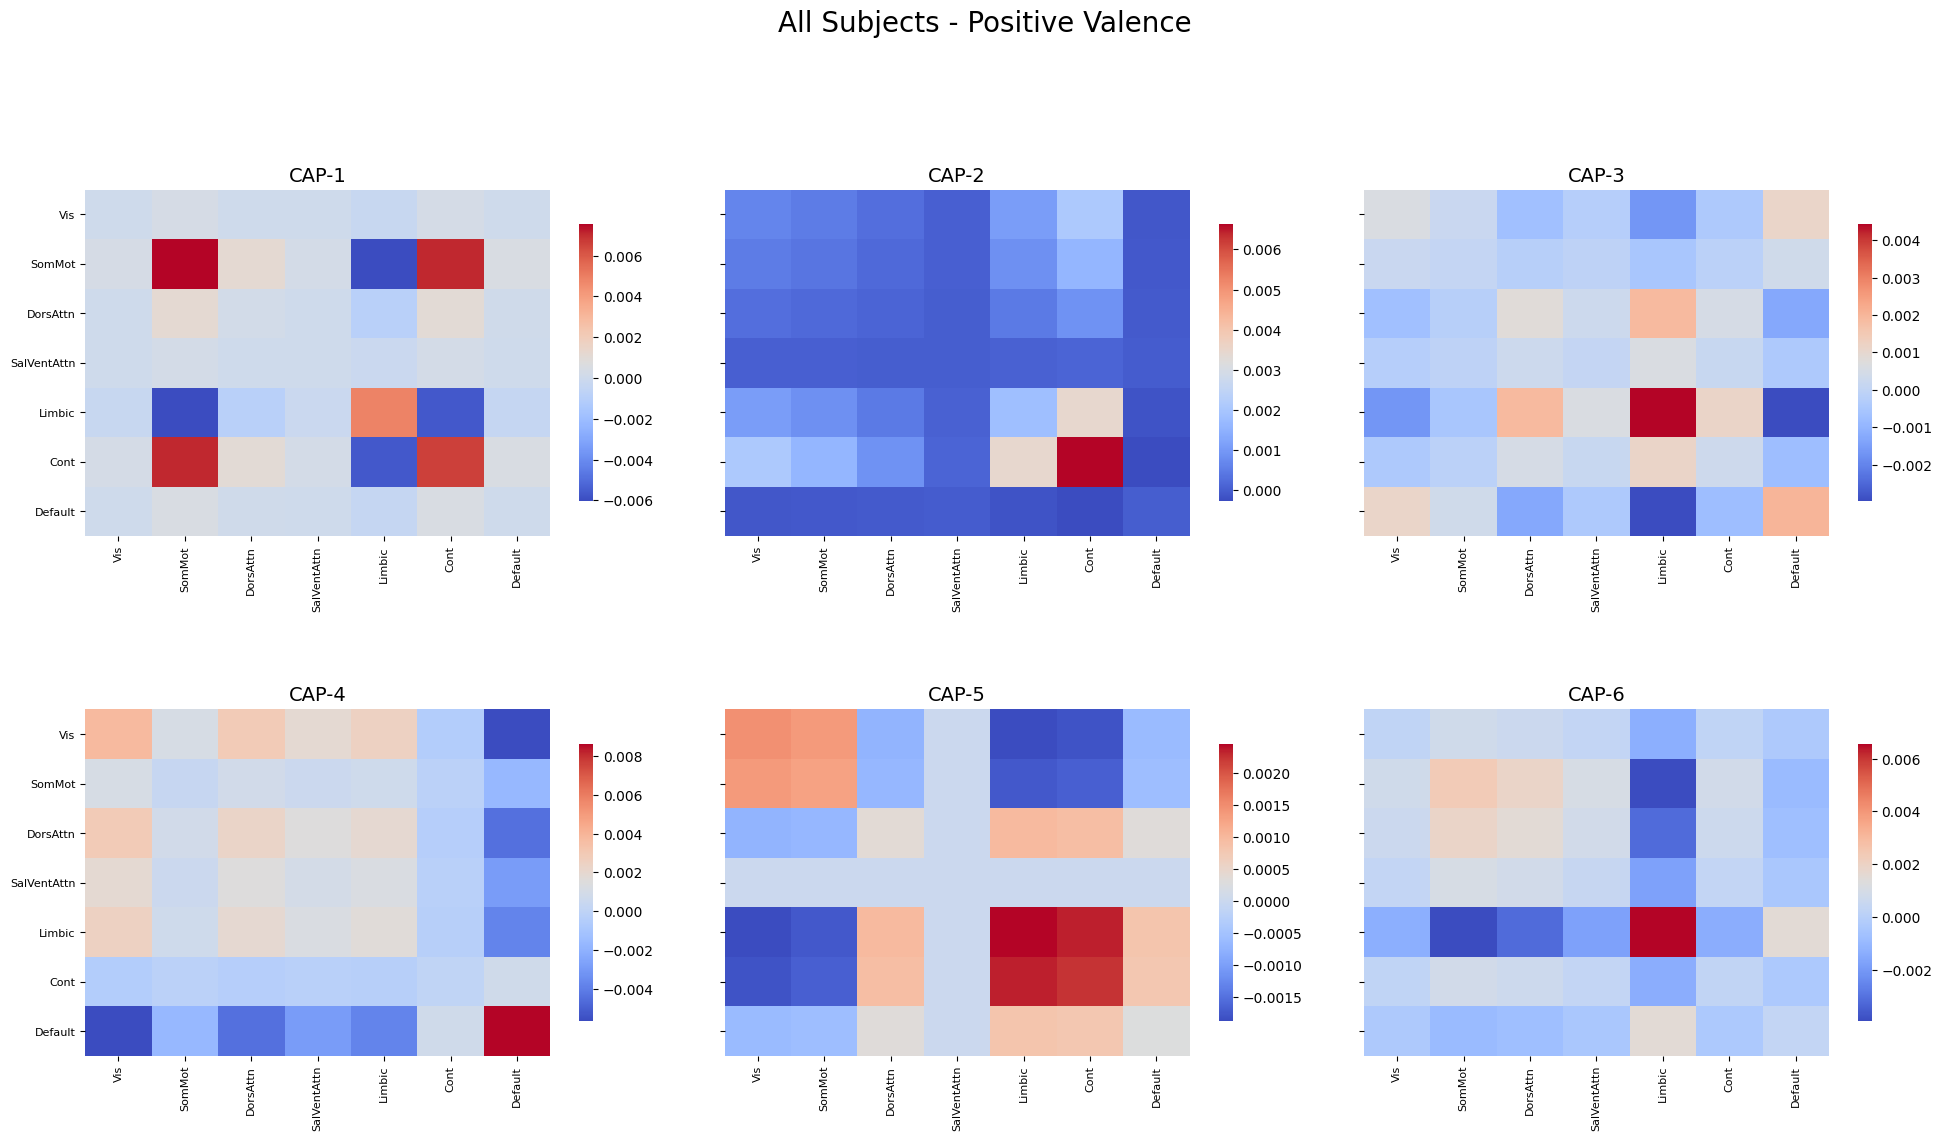

In [26]:
# Performing Cap analysis without groups or cluster selection method

cap_analysis = CAP(parcel_approach=extractor.parcel_approach, n_clusters=6)
cap_analysis.get_caps(subject_timeseries="sample_for_neurocaps_demo_timeseries.pkl")

# Invalid plotting keywords will be ignored and plotting will continue
cap_analysis.caps2plot(subplots=True, wspace = 0.1, hspace = 0.5, ncol=3, suffix_title="- Positive Valence", y = -3, xlabel_rotation=90, tight_layout=False, yticklabels_size=8, xticklabels_size=8)

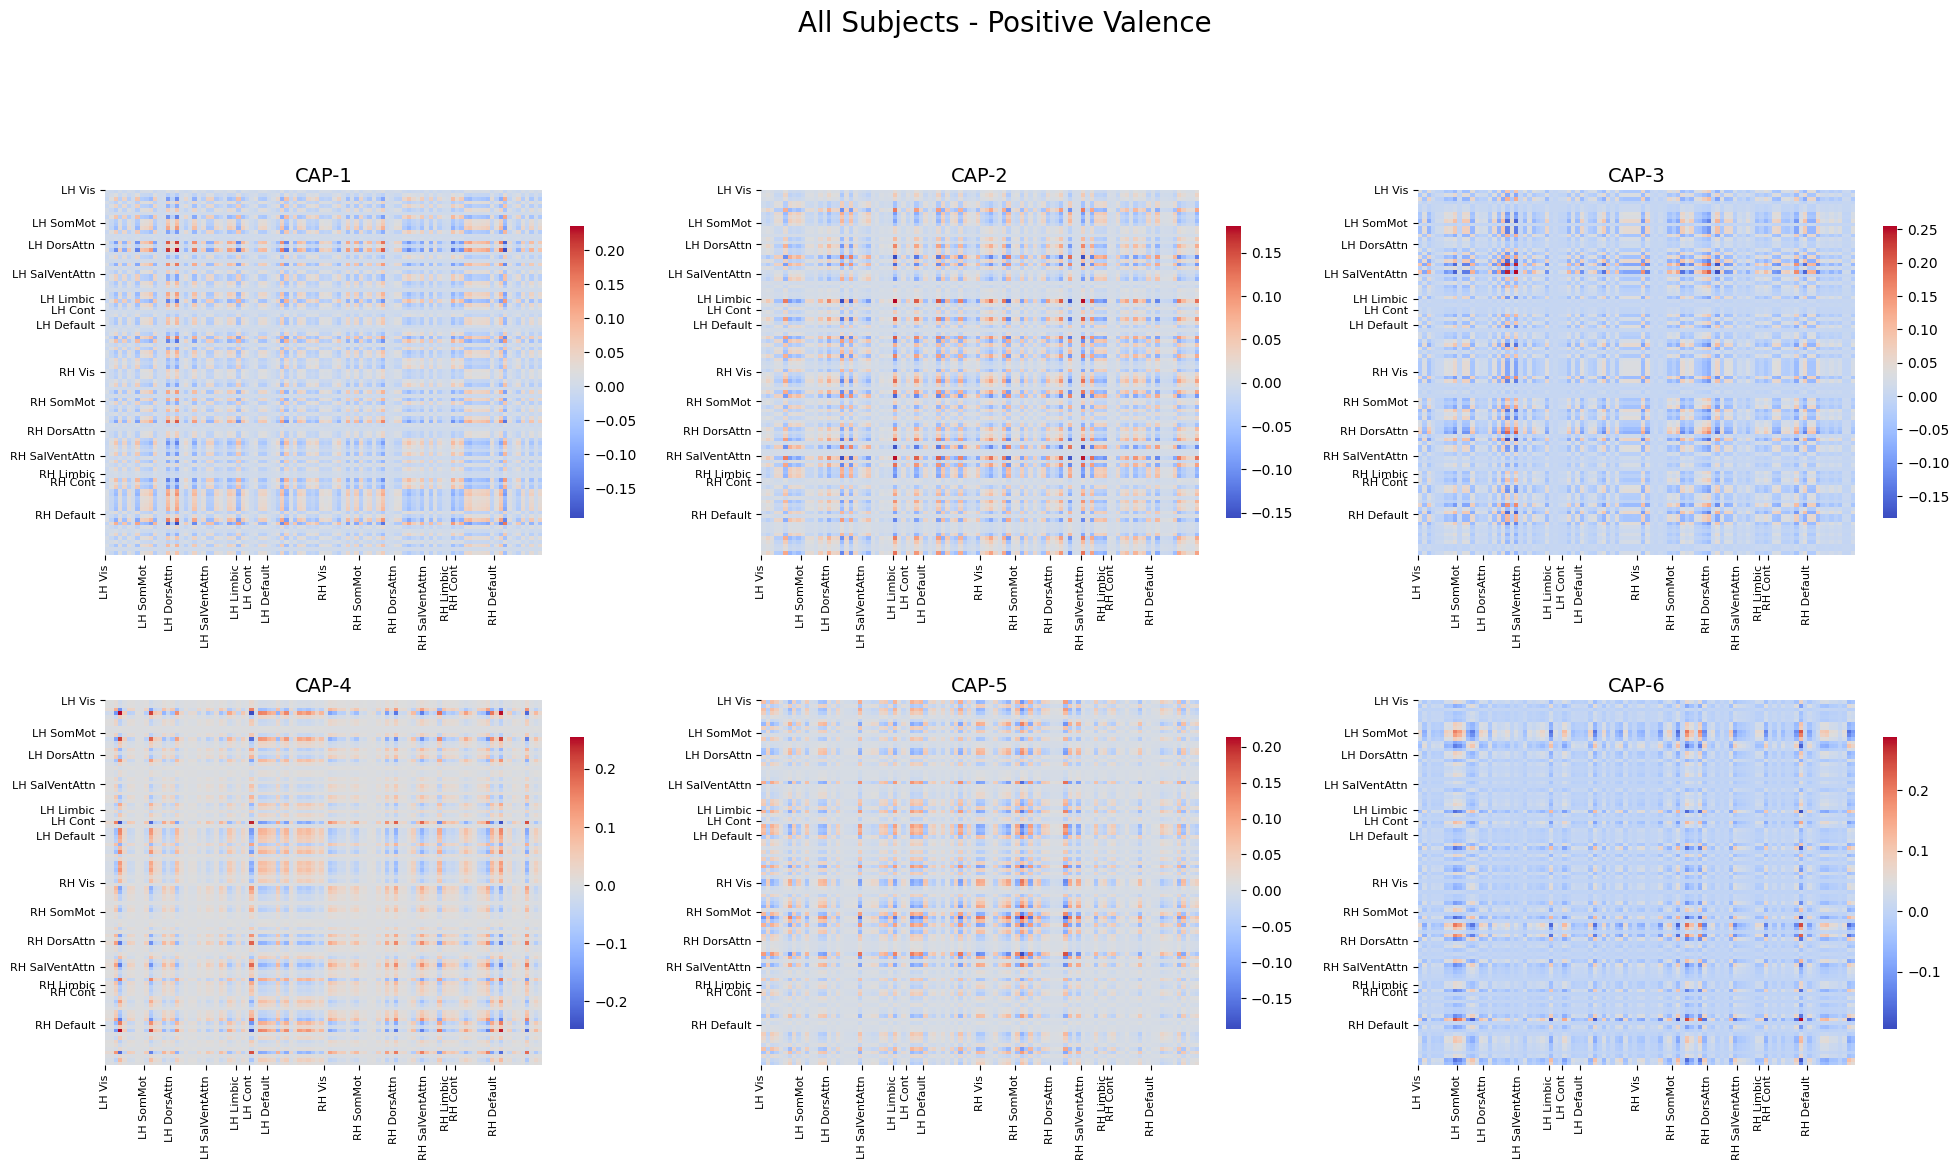

In [27]:
cap_analysis.caps2plot(visual_scope="nodes", plot_options="outer product", suffix_title="- Positive Valence", ncol=3, sharey=False, subplots=True, xlabel_rotation = 90, tight_layout=False, hspace = 0.4)

In [28]:
# Individual plots. In the event you wnat to merge TRs from two dictionaries conatining the same subject to find common CAPs across a task
subject_timeseries_1 = {str(x) : {f"run-{y}": np.random.rand(100,ncol) for y in range(1,4)} for x in range(1,11)}
subject_timeseries_2 = {str(x) : {f"run-{y}": np.random.rand(100,ncol) for y in range(1,4)} for x in range(1,7)}
# Includes `output_dir` and `file_name` parameters to save merge dictionary as a pickle file

# Returns combined dictionary as well as the reduced subject dictionaries containing only the subjects present in the combined
all_dicts = merge_dicts(subject_timeseries_list=[subject_timeseries_1, subject_timeseries_2], return_combined_dict=True, return_reduced_dicts=True)
# Only the combined subject dictionary
subject_timeseries_combined = merge_dicts(subject_timeseries_list=[subject_timeseries_1, subject_timeseries_2], return_combined_dict=True, return_reduced_dicts=False)

print(all_dicts["dict_0"].keys())
print(all_dicts["dict_1"].keys())
print(all_dicts["combined"].keys())

dict_keys(['1', '2', '3', '4', '5', '6'])
dict_keys(['1', '2', '3', '4', '5', '6'])
dict_keys(['1', '2', '3', '4', '5', '6'])


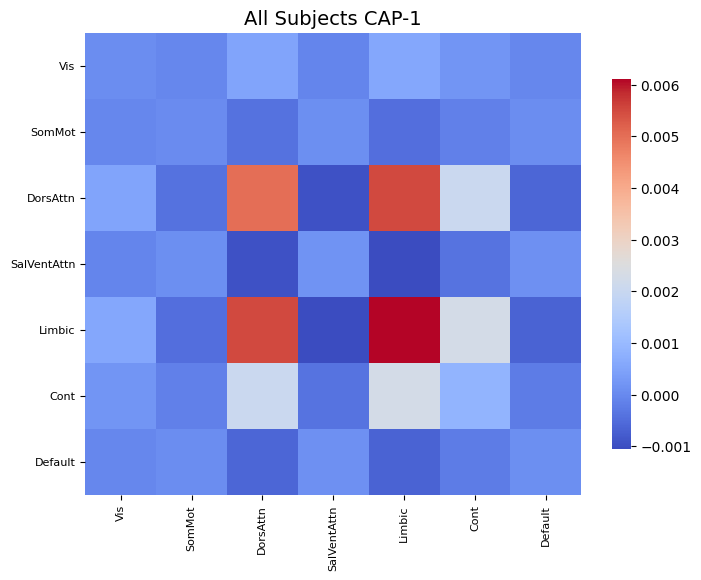

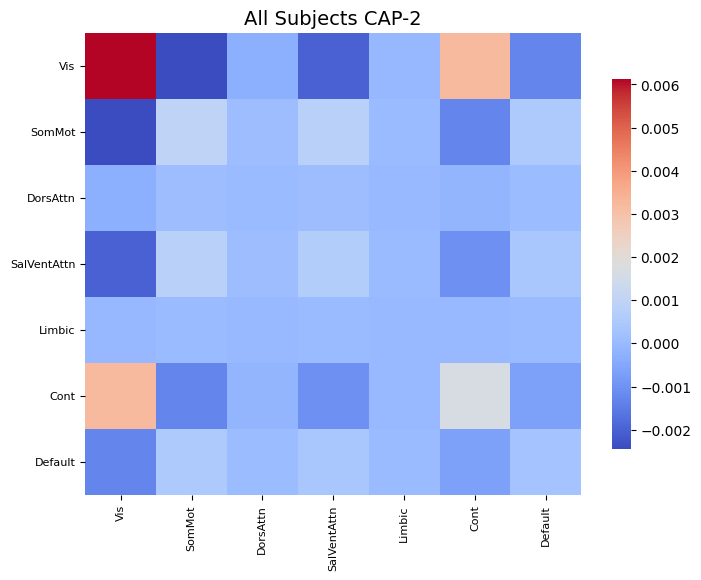

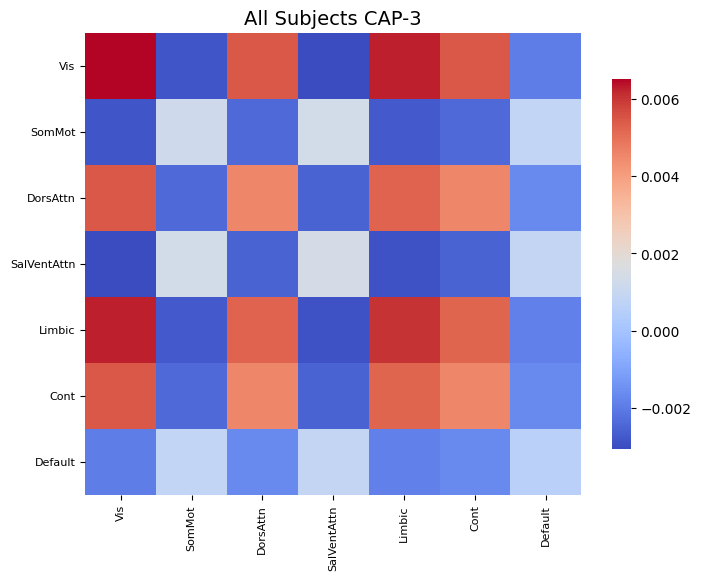

In [29]:
cap_analysis = CAP(parcel_approach=extractor.parcel_approach, n_clusters=3)
cap_analysis.get_caps(subject_timeseries=subject_timeseries_combined)
cap_analysis.caps2plot(xlabel_rotation=90)

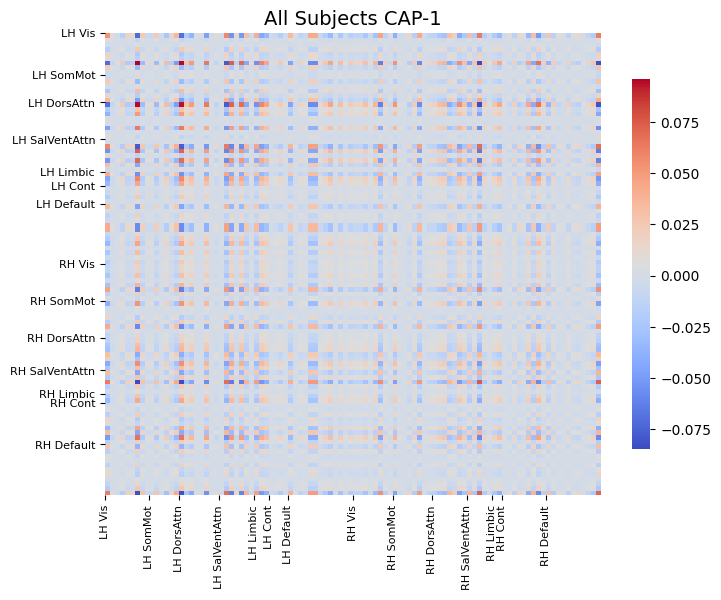

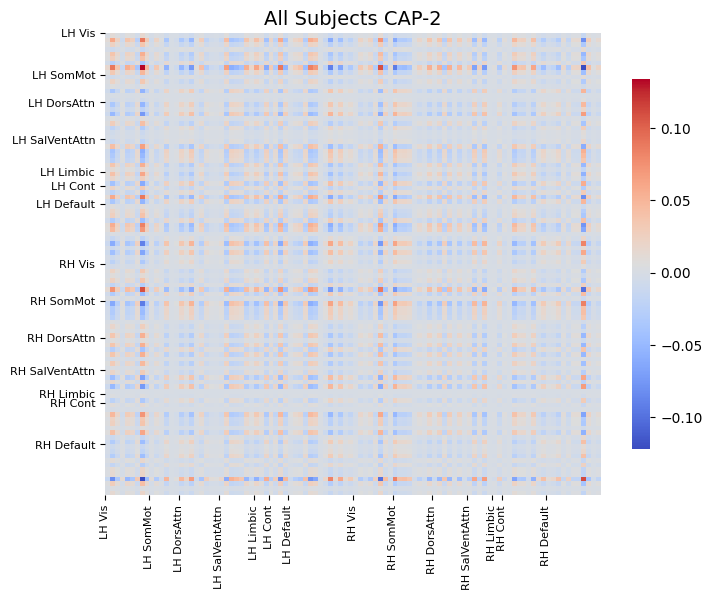

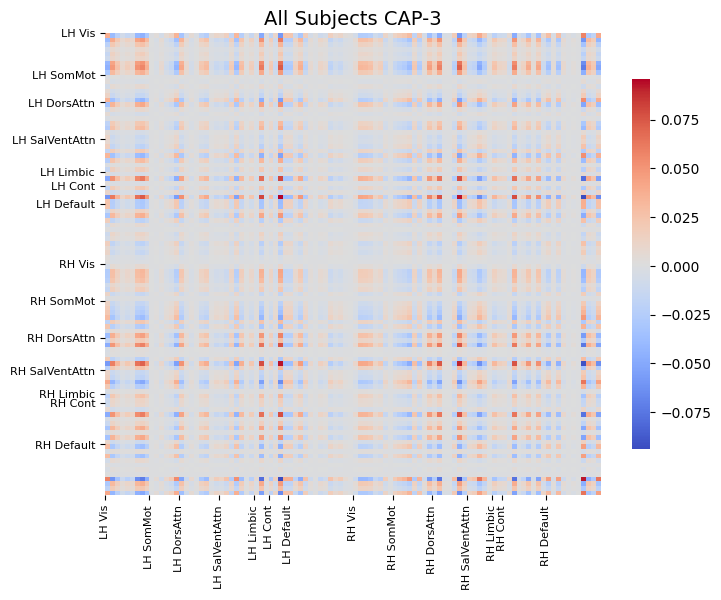

In [30]:
cap_analysis.caps2plot(visual_scope="nodes", plot_options="outer product", xlabel_rotation = 90)

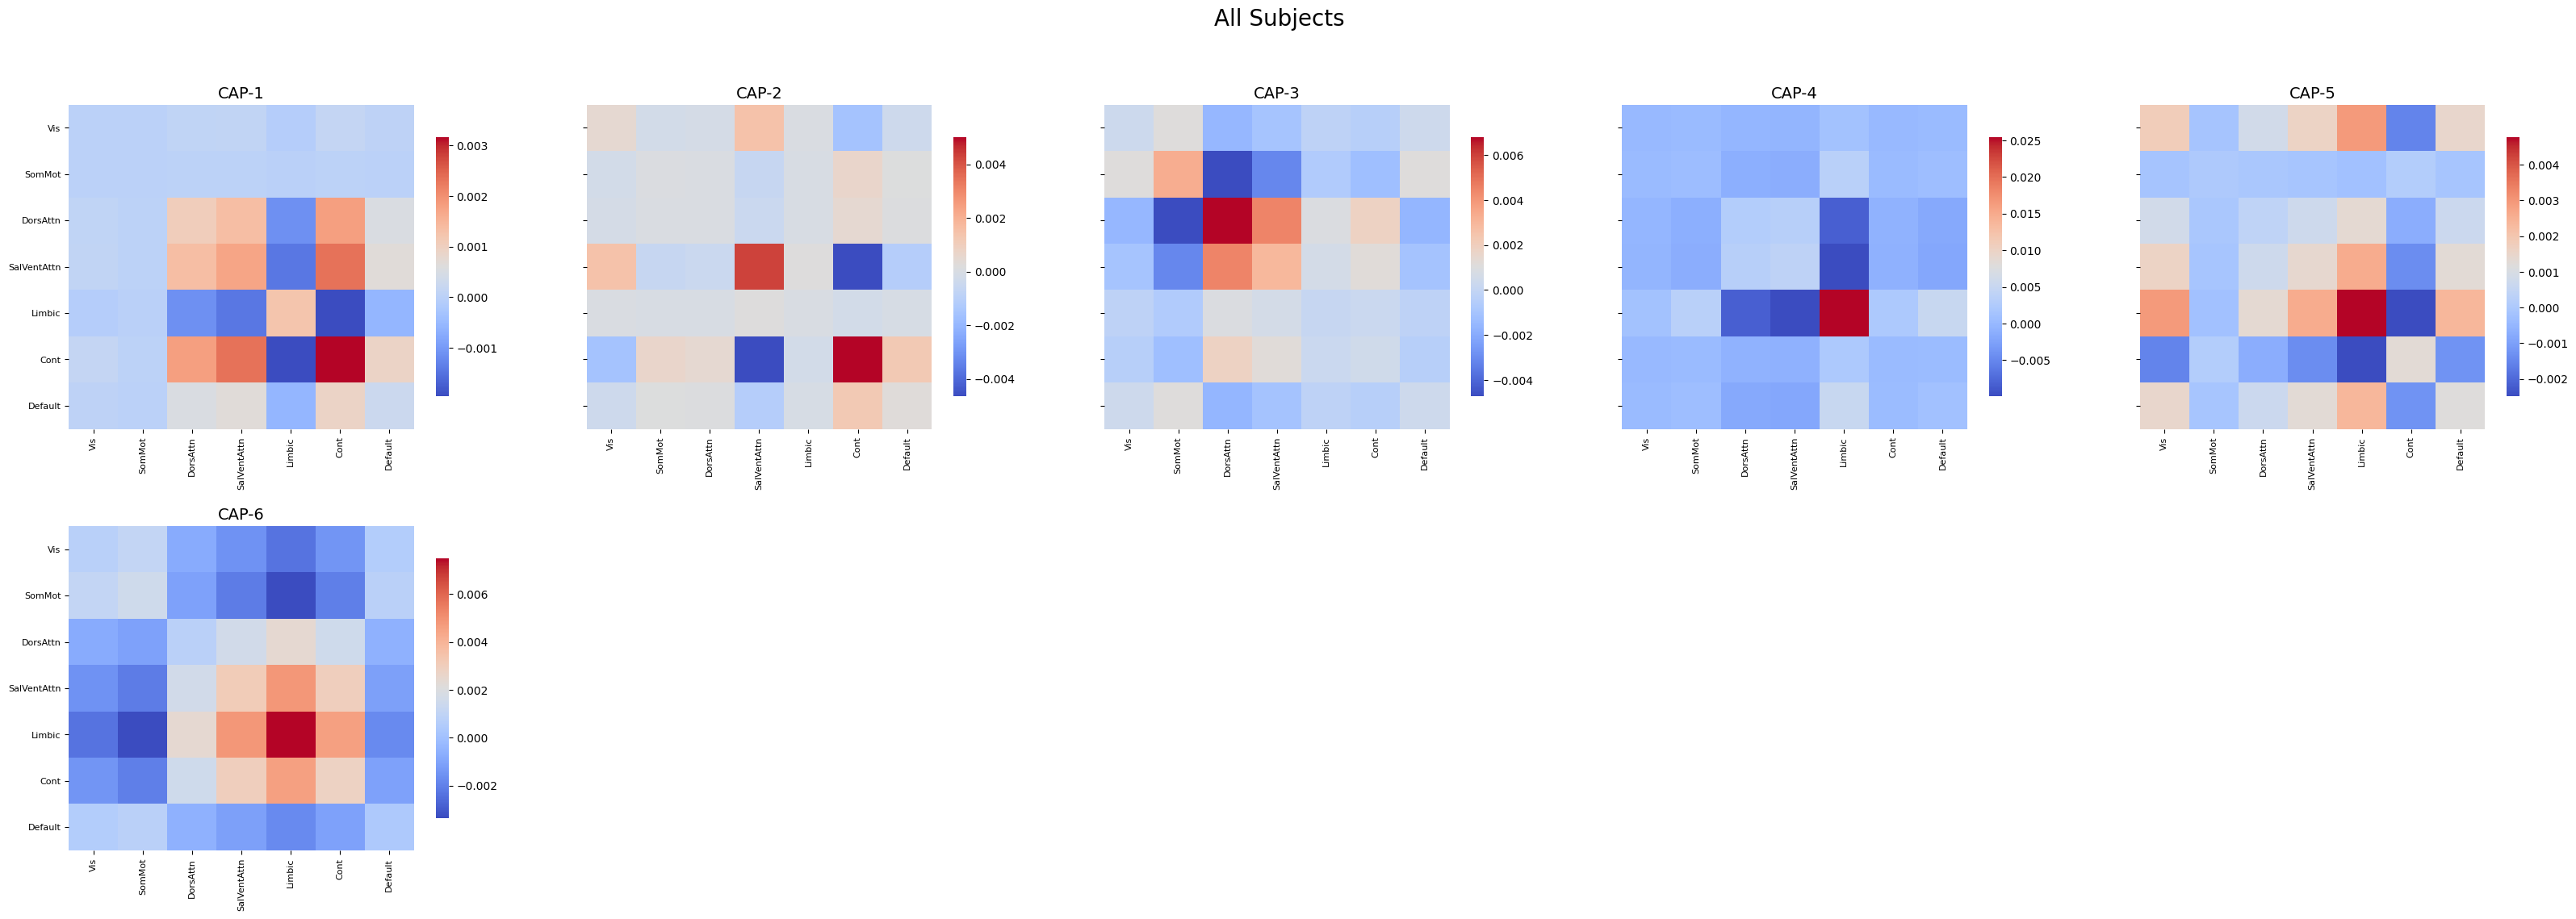

In [31]:
# Performing Caps analysis with no groups and no cluster selection method
cap_analysis = CAP(parcel_approach=extractor.parcel_approach, n_clusters=6)
cap_analysis.get_caps(subject_timeseries=extractor.subject_timeseries)
cap_analysis.caps2plot(visual_scope="regions", plot_options="outer product", subplots=True, fontsize=14, xlabel_rotation=90, tight_layout=False, hspace=0.3)

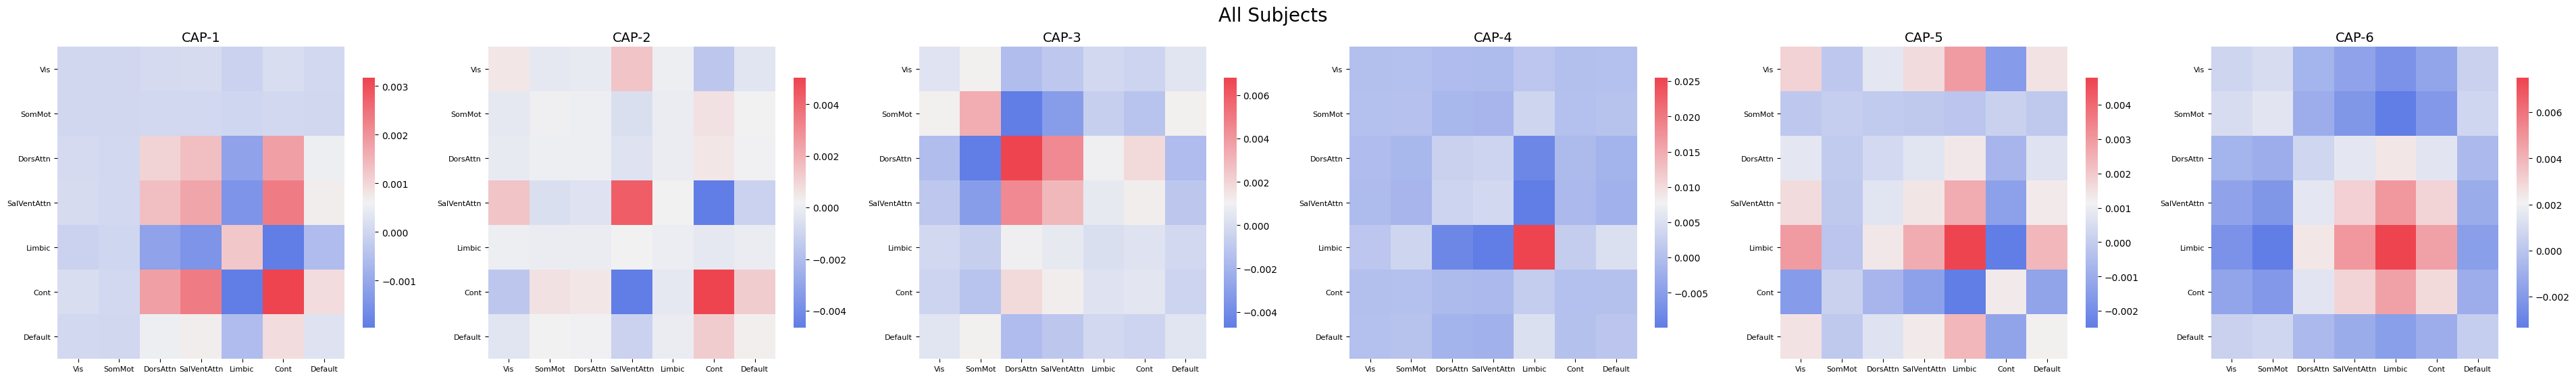

In [32]:
# Can change the number of columns for subplots. If none is specified, the default varies but will max out to five columns; however, you can specify more than five columns
#cap_analysis.caps2plot(output_dir=output_dir, visual_scope="regions", plot_options="outer product", subplots=True, fontsize=14, ncol=3, xlabel_rotation=90, tight_layout=False,  hspace = 0.3)
import seaborn as sns

sns.diverging_palette(145, 300, s=60, as_cmap=True)
palette = sns.diverging_palette(260, 10, s=80, l=55, n=256, as_cmap=True)
cap_analysis.caps2plot(visual_scope="regions", plot_options="outer product", subplots=True, fontsize=14, ncol=6, sharey=False, tight_layout=False, xlabel_rotation=0, hspace = 0.3, cmap=palette)

In [33]:
help(cap_analysis.caps2plot)

Help on method caps2plot in module neurocaps.analysis.cap:

caps2plot(output_dir: Union[str, os.PathLike, NoneType] = None, suffix_title: Optional[str] = None, plot_options: Union[str, List[str]] = 'outer product', visual_scope: List[str] = 'regions', show_figs: bool = True, subplots: bool = False, **kwargs) -> <function heatmap at 0x0000028A36A2A4D0> method of neurocaps.analysis.cap.CAP instance
        **Generate heatmaps and outer product plots of CAPs**
    
        This function produces seaborn heatmaps for each CAP. If groups were given when the CAP class was initialized,
        plotting will be done for all CAPs for all groups.
    
        Parameters
        ----------
            output_dir : Path or None, default=None
                Directory to save plots to. The directory will be created if it does not exist. If None, plots will not
                be saved.
            suffix_title : str or None, default=None
                Appended to the title of each plot as well as

In [34]:
#output = cap_analysis.calculate_metrics(subject_timeseries=extractor.subject_timeseries,return_df=True,output_dir=output_dir, runs=[1,2],file_name="All_Subjects_CAPs_metrics")
output = cap_analysis.calculate_metrics(subject_timeseries=extractor.subject_timeseries,return_df=True, runs=[1,2])
output["temporal fraction"]

,Subject_ID,Group,Run,CAP-1,CAP-2,CAP-3,CAP-4,CAP-5,CAP-6
0,1,All Subjects,run-1,0.16,0.16,0.18,0.16,0.26,0.08
1,1,All Subjects,run-2,0.02,0.16,0.16,0.28,0.14,0.24
2,2,All Subjects,run-1,0.24,0.20,0.10,0.16,0.18,0.12
3,2,All Subjects,run-2,0.08,0.18,0.24,0.22,0.12,0.16
4,3,All Subjects,run-1,0.08,0.14,0.18,0.20,0.18,0.22
5,3,All Subjects,run-2,0.20,0.26,0.14,0.12,0.10,0.18
6,4,All Subjects,run-1,0.16,0.10,0.14,0.28,0.14,0.18
7,4,All Subjects,run-2,0.18,0.14,0.10,0.16,0.16,0.26
8,5,All Subjects,run-1,0.16,0.12,0.18,0.30,0.14,0.10
9,5,All Subjects,run-2,0.16,0.08,0.16,0.16,0.20,0.24


In [35]:
#output = cap_analysis.calculate_metrics(subject_timeseries=extractor.subject_timeseries,return_df=True, output_dir=output_dir, runs=[1,2], continuous_runs=True, prefix_file_name="All_Subjects_CAPs_metrics")
cap_analysis.calculate_metrics(subject_timeseries=extractor.subject_timeseries,return_df=True, runs=[1,2], continuous_runs=True, output_dir=output_dir)
output["temporal fraction"]

,Subject_ID,Group,Run,CAP-1,CAP-2,CAP-3,CAP-4,CAP-5,CAP-6
0,1,All Subjects,run-1,0.16,0.16,0.18,0.16,0.26,0.08
1,1,All Subjects,run-2,0.02,0.16,0.16,0.28,0.14,0.24
2,2,All Subjects,run-1,0.24,0.20,0.10,0.16,0.18,0.12
3,2,All Subjects,run-2,0.08,0.18,0.24,0.22,0.12,0.16
4,3,All Subjects,run-1,0.08,0.14,0.18,0.20,0.18,0.22
5,3,All Subjects,run-2,0.20,0.26,0.14,0.12,0.10,0.18
6,4,All Subjects,run-1,0.16,0.10,0.14,0.28,0.14,0.18
7,4,All Subjects,run-2,0.18,0.14,0.10,0.16,0.16,0.26
8,5,All Subjects,run-1,0.16,0.12,0.18,0.30,0.14,0.10
9,5,All Subjects,run-2,0.16,0.08,0.16,0.16,0.20,0.24


In [36]:
help(cap_analysis.calculate_metrics)

Help on method calculate_metrics in module neurocaps.analysis.cap:

calculate_metrics(subject_timeseries: Union[Dict[str, Dict[str, numpy.ndarray]], str], tr: Optional[float] = None, runs: Optional[int] = None, continuous_runs: bool = False, metrics: Union[str, List[str]] = ['temporal fraction', 'persistence', 'counts', 'transition frequency'], return_df: bool = True, output_dir: Union[str, os.PathLike, NoneType] = None, prefix_file_name: Optional[str] = None) -> Dict[str, pandas.core.frame.DataFrame] method of neurocaps.analysis.cap.CAP instance
    **Get CAPs metrics**
    
    Creates a single pandas DataFrame containing CAP metrics for all participants, as described in Liu et al.,
    2018 and Yang et al., 2021. The metrics include:
    
     - `temporal fraction`: The proportion of total volumes spent in a single CAP over all volumes in a run.
     - `persistence`: The average time spent in a single CAP before transitioning to another CAP
       (average consecutive/uninterrupted 

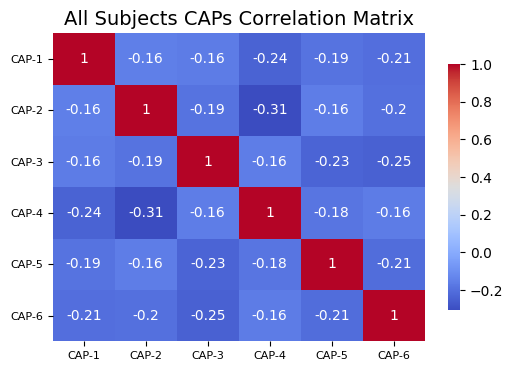

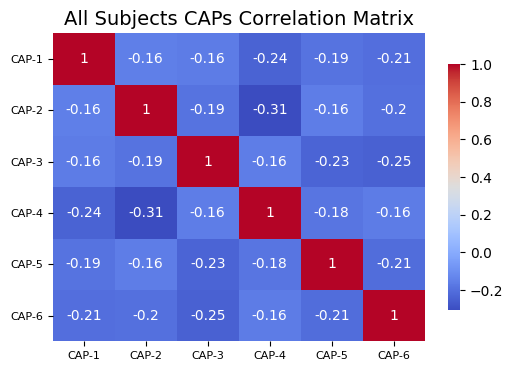

In [37]:
#cap_analysis.caps2corr(annot=True, output_dir=output_dir)
cap_analysis.caps2corr(annot=True ,figsize=(6,4))

import seaborn as sns
palette = sns.diverging_palette(260, 10, s=80, l=55, n=256, as_cmap=True)
cap_analysis.caps2corr(annot=True ,figsize=(6,4))

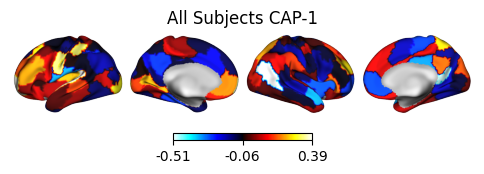

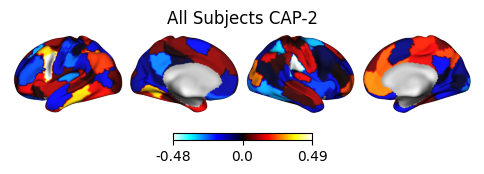

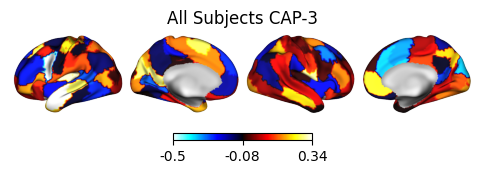

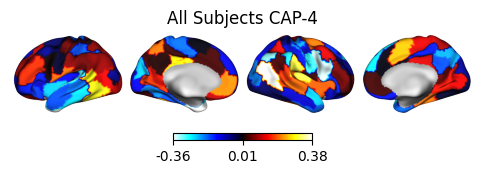

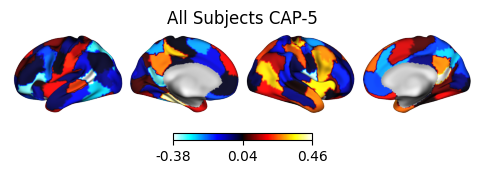

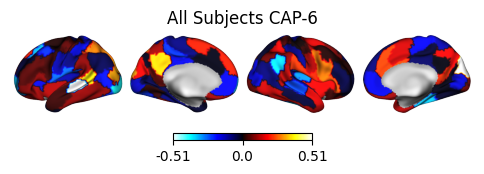

In [38]:
# If you experience coverage issues, usually smoothing helps to mitigate these issues

#cap_analysis.caps2surf(fwhm=1, output_dir=output_dir,save_stat_map=True)

cap_analysis.caps2surf(cmap="cold_hot", layout="row",  size=(500, 100))

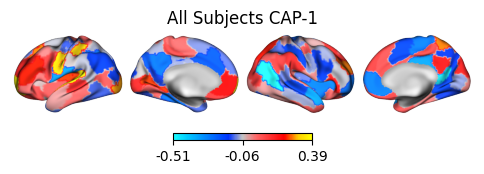

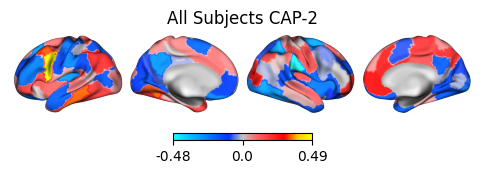

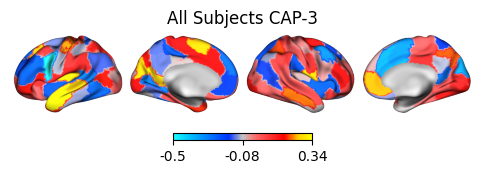

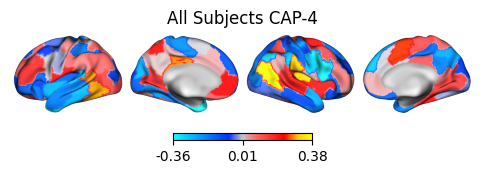

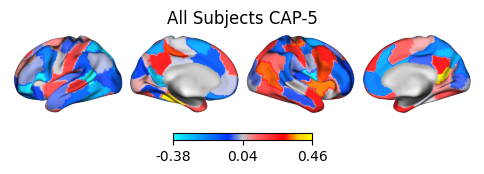

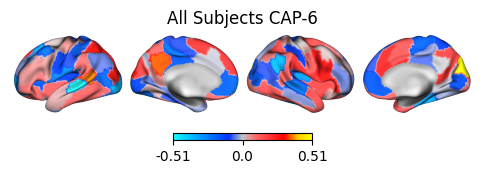

In [39]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#1bfffe", "#00ccff", "#0099ff", "#0066ff", "#0033ff", "#c4c4c4", "#ff6666", 
          "#ff3333", "#FF0000","#ffcc00","#FFFF00"]

# Create the colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_cold_hot", colors, N=256)
cap_analysis.caps2surf(cmap=custom_cmap, size=(500, 100), layout="row")

In [40]:
radialaxis={"showline": True, "linewidth": 2, "linecolor": "rgba(0, 0, 0, 0.25)", "gridcolor": "rgba(0, 0, 0, 0.25)", "ticks": "outside" , "tickfont": {"size": 14, "color": "black"},
"range": [0,0.3], "tickvals": [0.1,0.2,0.3]}
#cap_analysis.caps2radar(radialaxis=radialaxis, fill="toself", scattersize=10, output_dir = output_dir)
cap_analysis.caps2radar(radialaxis=radialaxis, fill="toself", scattersize=10)

In [41]:
# Can save caps a nifti statistical maps
cap_analysis.caps2niftis(output_dir=output_dir)

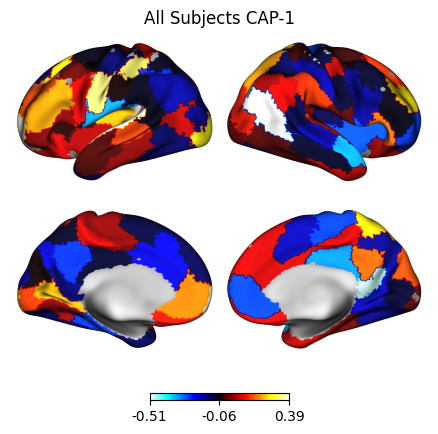

In [45]:
# If the statistical maps were converted to gifti using some other tool such as connectome workbench
#x = CAP(parcel_approach=parcel_approach)
#x.caps2surf(fslr_giftis_dict={"All Subjects": {"CAP-1": {"lh": "All_Subjects_CAP_1_L.gii", "rh": "All_Subjects_CAP_1_R.gii"}}})

In [43]:
os.remove("sample_for_neurocaps_demo_timeseries.pkl")